In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results


# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


In [11]:
# Design a query to retrieve the last 12 months of precipitation data 
from sqlalchemy import extract
from sqlalchemy import desc


In [12]:
#get the latest date
latest_date = session.query(Measurement.date, Measurement.prcp).order_by(desc('date')).first()
#to get the year before the latest date
#3-03-bonus
# to make a list of the date
list_latest_date = list(latest_date)
# to get the first index item of the list 
txt = list_latest_date[0]
#to split the list and make them as integers 
    #type(txt)
    #len(txt)
new_txt = txt.split("-")
latest_year = int(new_txt[0])
latest_month = int(new_txt[1])
latest_day = int(new_txt[2])
# Calculate the date 1 year ago from the last data point in the database
last_date = dt.date(latest_year,latest_month,latest_day) - dt.timedelta(days=365)
last_date
#==============================
#https://stackoverflow.com/questions/12019766/how-to-get-month-and-year-from-date-field-in-sqlalchemy
precipitation = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= last_date).order_by(Measurement.date).all()



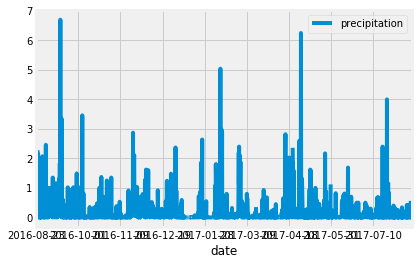

<Figure size 432x288 with 0 Axes>

In [13]:
#and plot the results
df = pd.DataFrame(precipitation, columns=['date','precipitation'])
df.set_index('date',inplace=True)
df.sort_index(ascending=True)
#df.head(56)
df.plot()
plt.show()
plt.savefig('Images/Xier_prcp.png')

In [14]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [15]:
# Design a query to show how many stations are available in this dataset?
counts = session.query(Station.station).count()
counts

9

In [16]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).\
order_by(func.count(Measurement.station).desc()).\
all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [17]:

# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

station_ID = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

station_ID = station_ID[0][0]
activest_station = session.query(Station.name)\
                      .filter_by(station = station_ID).all()
type(activest_station)
activest_station = activest_station[0]
activest_station

('WAIHEE 837.5, HI US')

#### Which station has the highest number of observations?


#### Hint: You may need to use functions such as func.min, func.max, func.avg, and func.count in your queries.


In [18]:
highest_tobs = session.query(Measurement.station, func.max(Measurement.tobs)).\
group_by(Measurement.station).\
order_by(func.count(Measurement.station).desc()).first()


highest_tobs

('USC00519281', 85.0)

In [19]:
lowest_tobs = session.query(Measurement.station, func.min(Measurement.tobs)).\
group_by(Measurement.station).\
order_by(func.count(Measurement.station).desc()).first()
lowest_tobs

('USC00519281', 54.0)

In [20]:
avg_tobs=session.query(Measurement.station, func.avg(Measurement.tobs)).\
group_by(Measurement.station).\
order_by(func.count(Measurement.station).desc()).first()
avg_tobs

('USC00519281', 71.66378066378067)

#### Design a query to retrieve the last 12 months of temperature observation data (tobs).


#### Filter by the station with the highest number of observations.


#### Plot the results as a histogram with bins=12.

In [21]:
station_ID

'USC00519281'

In [24]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station 
hightemp_data = session.query(Measurement.station, Measurement.date,Measurement.tobs).\
filter(Measurement.date >= last_date).\
filter(Measurement.station == station_ID).\
order_by(Measurement.tobs).all()
hightemp_data

[('USC00519281', '2017-02-02', 59.0),
 ('USC00519281', '2017-02-08', 59.0),
 ('USC00519281', '2017-02-09', 59.0),
 ('USC00519281', '2017-02-03', 60.0),
 ('USC00519281', '2017-04-30', 60.0),
 ('USC00519281', '2017-02-25', 61.0),
 ('USC00519281', '2016-12-15', 62.0),
 ('USC00519281', '2017-01-06', 62.0),
 ('USC00519281', '2017-01-09', 62.0),
 ('USC00519281', '2017-01-10', 62.0),
 ('USC00519281', '2017-02-10', 62.0),
 ('USC00519281', '2017-03-07', 62.0),
 ('USC00519281', '2016-11-07', 63.0),
 ('USC00519281', '2017-01-04', 63.0),
 ('USC00519281', '2017-01-05', 63.0),
 ('USC00519281', '2017-01-11', 63.0),
 ('USC00519281', '2017-01-03', 64.0),
 ('USC00519281', '2017-02-07', 64.0),
 ('USC00519281', '2017-03-08', 64.0),
 ('USC00519281', '2016-12-13', 65.0),
 ('USC00519281', '2017-01-12', 65.0),
 ('USC00519281', '2017-01-28', 65.0),
 ('USC00519281', '2017-02-16', 65.0),
 ('USC00519281', '2017-02-27', 65.0),
 ('USC00519281', '2017-03-18', 65.0),
 ('USC00519281', '2017-05-01', 65.0),
 ('USC005192

In [25]:
#plot the results as a histogram
temp_df = pd.DataFrame(hightemp_data)
temp_df


,station,date,tobs
0,USC00519281,2017-02-02,59.0
1,USC00519281,2017-02-08,59.0
2,USC00519281,2017-02-09,59.0
3,USC00519281,2017-02-03,60.0
4,USC00519281,2017-04-30,60.0
...,...,...,...
347,USC00519281,2017-07-30,81.0
348,USC00519281,2017-07-23,82.0
349,USC00519281,2017-07-29,82.0
350,USC00519281,2017-08-05,82.0


In [26]:
temp_df = temp_df.set_index('date')
temp_df = temp_df.sort_index(ascending=True)

In [27]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
#https://matplotlib.org/tutorials/intermediate/legend_guide.html

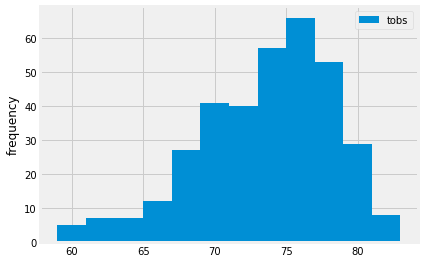

<Figure size 432x288 with 0 Axes>

In [28]:
temp_df.hist(bins = 12)
plt.ylabel('frequency')
patch = mpatches.Patch(label='tobs')
plt.legend(handles=[patch])
plt.tight_layout()
plt.title('')
plt.show()
#https://stackoverflow.com/questions/11373610/save-matplotlib-file-to-a-directory
plt.savefig('Images/Xier_tobs.png')

In [29]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """


    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [30]:
#Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
start_Date = '2011-02-28'
end_Date = '2011-03-05'
calc_temps(start_Date,end_Date)


[(61.0, 69.75510204081633, 75.0)]

In [31]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [32]:
avg_temp = calc_temps(start_Date,end_Date)
TMIN = avg_temp[0][0]
TAVE = avg_temp[0][1]
TMAX = avg_temp[0][2]

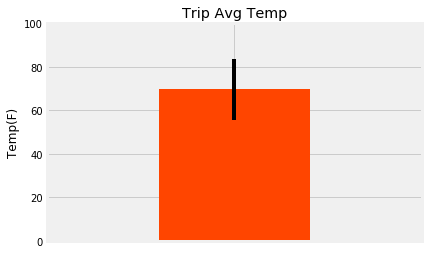

<Figure size 432x288 with 0 Axes>

In [34]:
# Plot the results from your previous query as a bar chart. 

# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
x = ''
errorBars = TMAX-TMIN
plt.ylim(0, 100)
plt.xlim(-1, 1)
plt.bar(x, TAVE,yerr =errorBars,color = 'orangered')
plt.title('Trip Avg Temp')
plt.ylabel('Temp(F)')
plt.show()
plt.savefig('Images/avgtempbar.png')

In [35]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.

sum_prcp = session.query(Measurement.station,func.sum(Measurement.prcp)).\
filter(Measurement.date >= start_Date).filter(Measurement.date <= end_Date).group_by(Measurement.station).all()
sum_prcp


[('USC00511918', 0.63),
 ('USC00513117', 1.44),
 ('USC00514830', 1.96),
 ('USC00516128', 1.45),
 ('USC00517948', None),
 ('USC00518838', 2.33),
 ('USC00519281', 2.23),
 ('USC00519397', 1.38),
 ('USC00519523', 2.19)]

In [37]:
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
#3-03 practice 
sel = ([Station.station, Station.name, Station.latitude,Station.longitude,\
        Station.elevation,func.sum(Measurement.prcp)])
rainfall = session.query(*sel).filter(Station.station == Measurement.station).\
    filter(Measurement.date >= start_Date).filter(Measurement.date <= end_Date).\
    group_by(Station.station).\
    order_by(func.sum(Measurement.prcp).desc()).all()
rainfall

[('USC00518838',
  'UPPER WAHIAWA 874.3, HI US',
  21.4992,
  -158.0111,
  306.6,
  2.33),
 ('USC00519281',
  'WAIHEE 837.5, HI US',
  21.45167,
  -157.84888999999998,
  32.9,
  2.23),
 ('USC00519523',
  'WAIMANALO EXPERIMENTAL FARM, HI US',
  21.33556,
  -157.71139,
  19.5,
  2.19),
 ('USC00514830',
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  21.5213,
  -157.8374,
  7.0,
  1.96),
 ('USC00516128',
  'MANOA LYON ARBO 785.2, HI US',
  21.3331,
  -157.8025,
  152.4,
  1.45),
 ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 1.44),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 1.38),
 ('USC00511918',
  'HONOLULU OBSERVATORY 702.2, HI US',
  21.3152,
  -157.9992,
  0.9,
  0.63),
 ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, None)]

In [38]:
#convert to data frame
#convert query object to data frame
stationRainTable = pd.DataFrame(np.array(rainfall))
#rename columns
stationRainTable = stationRainTable.rename(columns={0: "Station", 1: "Location", 
                                                    2: "Total Precipitation", 3: "Latitude", 
                                                    4: "Longitude", 5: "Elevation"})
stationRainTable


,Station,Location,Total Precipitation,Latitude,Longitude,Elevation
0,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.4992,-158.011,306.6,2.33
1,USC00519281,"WAIHEE 837.5, HI US",21.4517,-157.849,32.9,2.23
2,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.3356,-157.711,19.5,2.19
3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.5213,-157.837,7,1.96
4,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.3331,-157.803,152.4,1.45
5,USC00513117,"KANEOHE 838.1, HI US",21.4234,-157.802,14.6,1.44
6,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.817,3,1.38
7,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.3152,-157.999,0.9,0.63
8,USC00517948,"PEARL CITY, HI US",21.3934,-157.975,11.9,None


# Step 2 - Climate App

Now that you have completed your initial analysis, design a Flask API based on the queries that you have just developed.

Use FLASK to create your routes.


Routes


/


Home page.


List all routes that are available.




/api/v1.0/precipitation


Convert the query results to a Dictionary using date as the key and prcp as the value.


Return the JSON representation of your dictionary.




/api/v1.0/stations

Return a JSON list of stations from the dataset.



/api/v1.0/tobs

query for the dates and temperature observations from a year from the last data point.
Return a JSON list of Temperature Observations (tobs) for the previous year.



/api/v1.0/<start> and /api/v1.0/<start>/<end>


Return a JSON list of the minimum temperature, the average temperature, and the max temperature for a given start or start-end range.


When given the start only, calculate TMIN, TAVG, and TMAX for all dates greater than and equal to the start date.


When given the start and the end date, calculate the TMIN, TAVG, and TMAX for dates between the start and end date inclusive.





Hints


You will need to join the station and measurement tables for some of the analysis queries.


Use Flask jsonify to convert your API data into a valid JSON response object.

## Optional Challenge Assignment

In [20]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [21]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


[(62.0, 69.15384615384616, 77.0),
 (60.0, 69.39622641509433, 77.0),
 (62.0, 68.9090909090909, 77.0),
 (58.0, 70.0, 76.0),
 (56.0, 67.96428571428571, 76.0),
 (61.0, 68.96491228070175, 76.0),
 (57.0, 68.54385964912281, 76.0)]

In [22]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


,tmin,tavg,tmax
date,,,
2018-01-01,62.0,69.153846,77.0
2018-01-02,60.0,69.396226,77.0
2018-01-03,62.0,68.909091,77.0
2018-01-04,58.0,70.000000,76.0
2018-01-05,56.0,67.964286,76.0


<IPython.core.display.Javascript object>


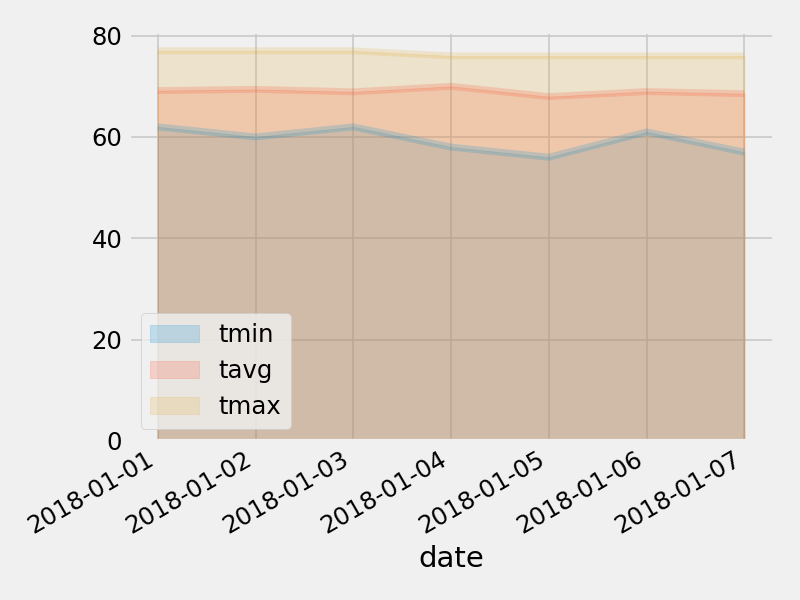

In [23]:
# Plot the daily normals as an area plot with `stacked=False`
